In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from matplotlib.colors import ListedColormap

In [2]:
def laplacian(X):
    D = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        k = 0
        for j in range(len(X)):
            if(X[i][j] == 1):
                k = k + 1
        D[i][i] = k
    L = D - X
    return L

In [3]:
def fiedler_vector(X):
    w, v = np.linalg.eig(X)
    
    f_i = np.argsort(w)[1]
    if(len(X) == 20):
        f_i = f_i + 1
    fiedler = []
    for i in range(len(v)):
        fiedler.append(v[i][f_i])
#     w.sort()
#     print(w)
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.plot(1. + np.arange(len(w)), w, '*', markersize=10, color='magenta')
#     ax.set_xlabel(r'index', fontsize=16)
#     ax.set_ylabel(r'eigen value', fontsize=16)
#     ax.grid()
#     plt.savefig("eig3.png")
#     plt.show()
    return fiedler

In [8]:
def fiedler_graphic(fiedler):
    fiedler.sort()
    # print(fiedler)
    k1=0
    k2=0
    for i in range(len(fiedler)):
        if(fiedler[i] > 0):
            k1 = k1 + 1
        else:
            k2 = k2 + 1
    print(k1)
    print(k2)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(1. + np.arange(len(fiedler)), fiedler, '*', markersize=10, color='magenta')
    ax.set_xlabel(r'index', fontsize=16)
    ax.set_ylabel(r'fiedler value', fontsize=16)
    ax.grid()
    plt.savefig("f3.png")
    plt.show()

In [5]:
def sorted_matrix(X, fiedler):
    s = pd.Series(fiedler).sort_values(ascending=True)
    indexes = s.index.tolist()
    print(indexes)
    X_sort = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            X_sort[i][j] = X[indexes[i]][indexes[j]]
    return X_sort

In [6]:
A1 = np.ones((10, 10))
for i in range(10):
    for j in range(10):
        if i == j:
            A1[i][j] = 0
L1 = laplacian(A1)


A2 = np.zeros((20, 20))
A2[0][1] = A2[0][3] = A2[0][4] = 1
A2[1][2] = A2[1][7] = A2[1][4] = A2[1][0] = 1
A2[2][4] = A2[2][3] = A2[2][1] = 1
A2[3][2] = A2[3][0] = A2[3][6] = A2[3][19] = 1
A2[4][0] = A2[4][1] = A2[4][2] = A2[4][5] = A2[4][6] = A2[4][7] = 1
A2[5][4] = A2[5][7] = A2[5][6] = A2[5][12] = 1
A2[6][4] = A2[6][5] = A2[6][3] = A2[6][7] = A2[6][18] = 1
A2[7][1] = A2[7][4] = A2[7][5] = A2[7][6] = A2[7][14] = 1
A2[8][14] = A2[8][9] = 1
A2[9][8] = A2[9][10] = A2[9][11] = A2[9][13] = A2[9][14] = 1
A2[10][9] = A2[10][15] = A2[10][12] = A2[10][14] = 1
A2[11][14] = A2[11][12] = A2[11][9] = 1
A2[12][5] = A2[12][11] = A2[12][10] = A2[12][14] = A2[12][13] = 1
A2[13][12] = A2[13][14] = A2[13][9] = 1
A2[14][12] = A2[14][11] = A2[14][10] = A2[14][13] = A2[14][8] = A2[14][9] = A2[14][7] = 1
A2[15][10] = A2[15][16] = A2[15][17] = A2[15][18] = 1
A2[16][15] = A2[16][17] = A2[16][18] = A2[16][19] = 1
A2[17][15] = A2[17][16] = A2[17][18] = A2[17][19] = 1
A2[18][6] = A2[18][19] = A2[18][17] = A2[18][16] = A2[18][15] = 1
A2[19][3] = A2[19][18] = A2[19][16] = A2[19][17] = 1
L2 = laplacian(A2)

with open('adjacency_matrix.txt') as f:
    A3 = [list(map(int, row.split())) for row in f.readlines()]
A3 = np.array(A3)
L3 = laplacian(A3)

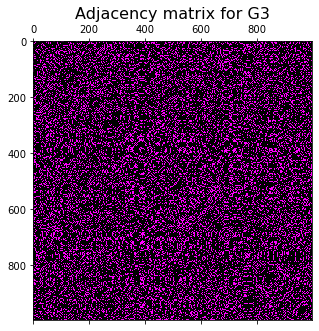

In [12]:
fiedler_graphic(fiedler_vector(L1))
plt.figure(figsize=(5,5))
print(sorted_matrix(A1, fiedler_vector(L1)))
plt.matshow(sorted_matrix(A1, fiedler_vector(L1)), fignum=1, cmap = ListedColormap(['black', 'magenta']))
plt.title("Spectral Clastering for G1", fontsize=16)
plt.show()

plt.figure(figsize=(5,5))
plt.matshow(A3, fignum=1, cmap = ListedColormap(['black', 'magenta']))
plt.title("Adjacency matrix for G3", fontsize=16)
plt.savefig("a3.png")
plt.show()

fiedler_graphic(fiedler_vector(L2))
plt.figure(figsize=(5,5))
plt.matshow(sorted_matrix(A2, fiedler_vector(L2)), fignum=1, cmap = ListedColormap(['black', 'magenta']))
plt.title("Spectral Clastering for G2", fontsize=16)
plt.savefig("cluster2.png")
plt.show()

fiedler_graphic(fiedler_vector(L3))
plt.figure(figsize=(6,6))
plt.matshow(sorted_matrix(A3, fiedler_vector(L3)), fignum=1, cmap = ListedColormap(['black', 'magenta']))
plt.title("Spectral Clastering for G3", fontsize=16)
plt.xticks(np.arange(0, 1200, step=200))
plt.yticks(np.arange(0, 1200, step=200))
plt.savefig("cluster3.png")
plt.show()